https://www.youtube.com/watch?v=ftMq5ps503w

In [80]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time
import quandl
import numpy

In [81]:
!rm test.csv
!ls -l

rm: test.csv: No such file or directory
total 7040
-rw-r--r--  1 nicolasfeller  staff  3518194 15 Oct 14:45 Analyzing Cryptocurrency Markets Using Python.ipynb
-rw-r--r--  1 nicolasfeller  staff    44414 15 Oct 17:13 Predicting Stock Prices.ipynb
-rw-r--r--  1 nicolasfeller  staff      935 17 Oct 14:52 Stock Market Prediction.ipynb
drwxr-xr-x  3 nicolasfeller  staff      102 18 Oct 12:13 __pycache__
-rw-r--r--  1 nicolasfeller  staff     3636 18 Oct 12:13 lstm.py
-rw-r--r--  1 nicolasfeller  staff    30796 19 Oct 13:39 stock prediction.ipynb


In [89]:
def quandl_to_csv(stock):
    data = quandl.get("WIKI/AAPL", start_date="2007-01-01", end_date="2017-10-01")
    data = numpy.array(data['Close'])
    with open("test.csv", "a") as fh:
        for close in data:
            fh.write(str(close))
            fh.write('\n')
    
    
quandl_to_csv("WIKI/AAPL")

In [90]:
X_train, y_train, X_test, y_test = lstm.load_data('test.csv', 50, True)

In [92]:
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True
))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False
))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1
))
model.add(Activation('linear'))

In [93]:
start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print('compile time : {}'.format(time.time()-start))

compile time : 0.06021404266357422


In [94]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05
)

Train on 2645 samples, validate on 140 samples
Epoch 1/1
2645/2645 [==============================] - 7s - loss: 0.0221 - val_loss: 0.0036


yo


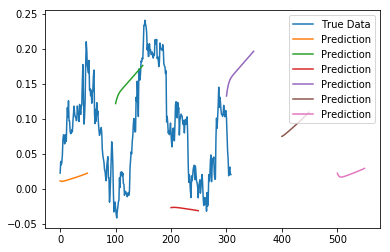

In [95]:
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
lstm.plot_results_multiple(predictions, y_test, 100)